# Walmart Sales 

In [113]:
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots as smt
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12.0, 8.0)

sns.set(font_scale=1.3)
sns.set_style("white")

%run common.py
%matplotlib inline

# Data

## Sell Price

In [2]:
sell_price_data = pd.read_csv('data/sell_prices.csv')

sell_price_df = (sell_price_data
                 .pipe(start_pipeline)
                 .pipe(clean_sell_price))

sell_price_df.head()

start_pipeline took 0:00:00.109172, shape = (6841121, 4)
clean_sell_price took 0:00:00.335004, shape = (6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


## Calendar 

In [3]:
calendar_data = pd.read_csv('data/calendar.csv')

calendar_df = (calendar_data
 .pipe(start_pipeline)
 .pipe(clean_calendar))

calendar_df.head()

start_pipeline took 0:00:00.000265, shape = (1969, 14)
clean_calendar took 0:00:00.018911, shape = (1969, 13)


,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,
2011-01-29,11101,Saturday,5,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,11101,Sunday,6,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,11101,Monday,0,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,11101,Tuesday,1,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,11101,Wednesday,2,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


### Date/Time

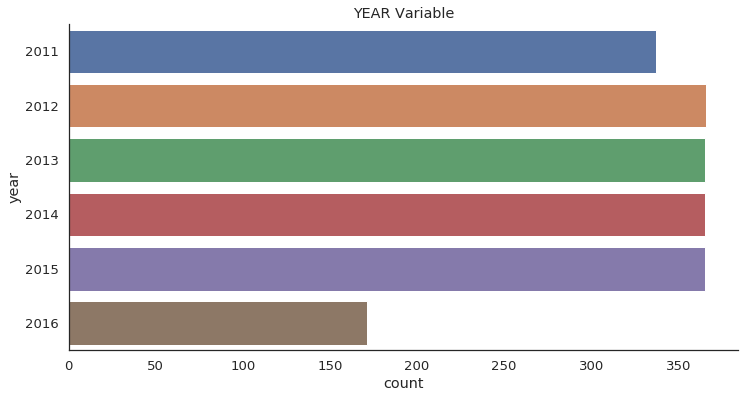

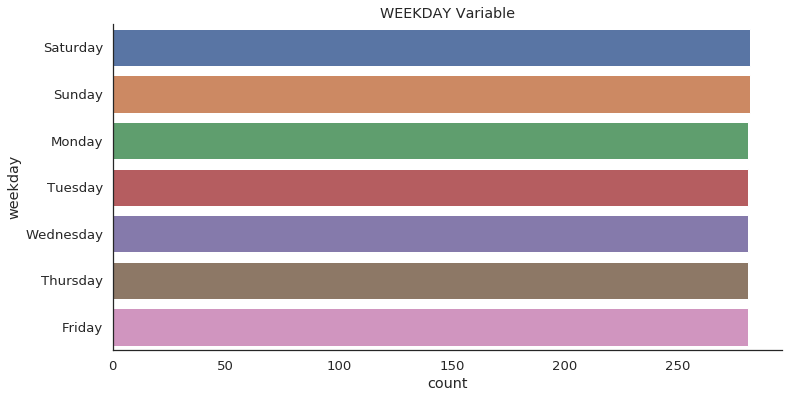

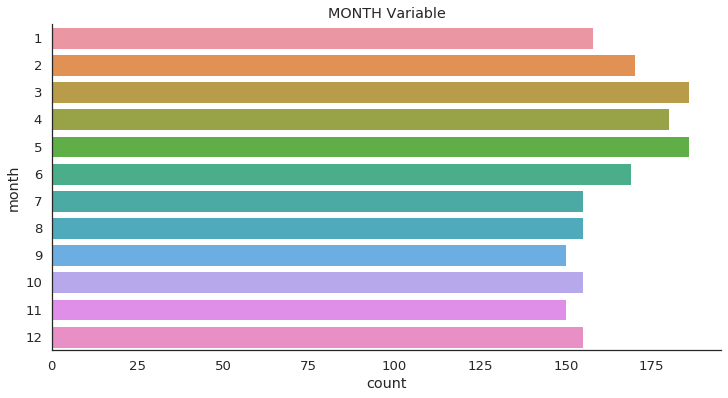

In [4]:
sns.set(font_scale=1.2)
sns.set_style("white")
for col in (["year", "weekday", "month"]):
    plt.figure(figsize = (12,6))
    g = sns.countplot(y =calendar_df[col])
    g.set_title(col.upper() + ' Variable')
    sns.despine()


### Events

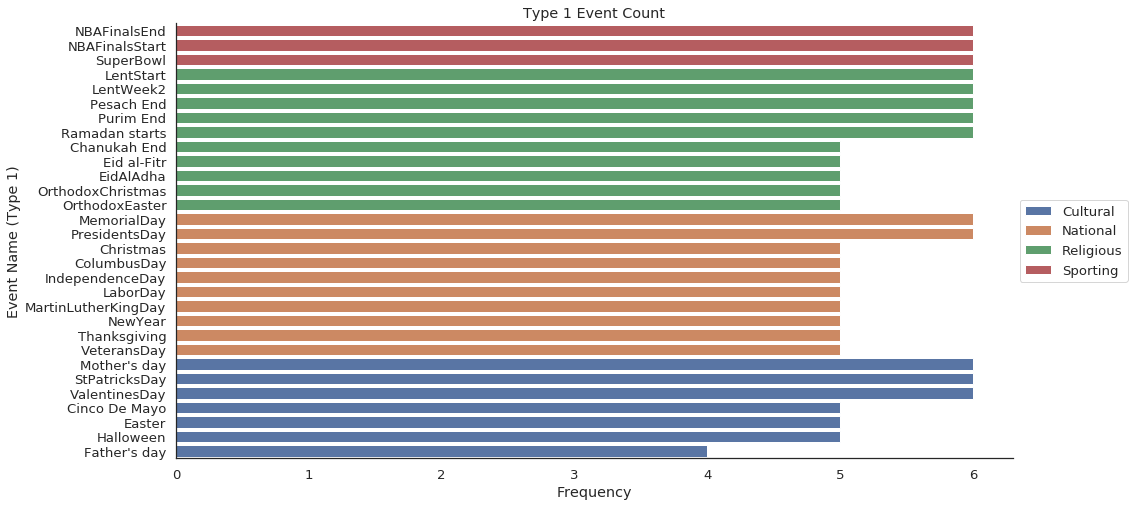

In [5]:
event1 = (calendar_df.groupby(["event_type_1", "event_name_1"])
     .count().dropna()['d']
     .reset_index(level=[0,1])
     .sort_values(['event_type_1', 'd'], ascending=False))

#Bar Plot
plt.figure(figsize = (15,8))
g = sns.barplot(data = event1, 
                x = 'd', 
                y ="event_name_1", 
                hue = 'event_type_1',
                order = event1['event_name_1'],
                dodge = False)

#Labels and Legend
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
g.set(xlabel='Frequency',
      ylabel='Event Name (Type 1)',
      title = 'Type 1 Event Count')
sns.despine()

# #TODO calendar map 

In [6]:
# for col in (["snap_CA", "snap_TX", "snap_WI"]):
#     plt.figure(figsize = (15,8))
#     g = sns.countplot(y =calendar_df[col])
#     g.set_title(col.upper())

In [7]:
pd.date_range(start = calendar_df.index[0], end = calendar_df.index[-1] ).difference(calendar_df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

## Sample Train / Validation

In [8]:
sales_data = pd.read_csv('data/sales_train_validation.csv')

sales_df = (sales_data
 .pipe(start_pipeline)
 .pipe(clean_sales))

sales_df.head()

start_pipeline took 0:00:00.473213, shape = (30490, 1919)
clean_sales took 0:00:00.005238, shape = (30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [9]:
example_item = sales_df.loc[3,'id']
item_example = filter_item(example_item, sales_df, calendar_df)
item_example.head()

filter_item took 0:00:00.021995, shape = (1913, 13)


,HOBBIES_1_004_CA_1_validation,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,
2011-01-29,0,11101,Saturday,5,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,0,11101,Sunday,6,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,0,11101,Monday,0,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,0,11101,Tuesday,1,2,2011,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,0,11101,Wednesday,2,2,2011,NaN,NaN,NaN,NaN,1,0,1


[Text(0.5, 1.0, 'Sales')]

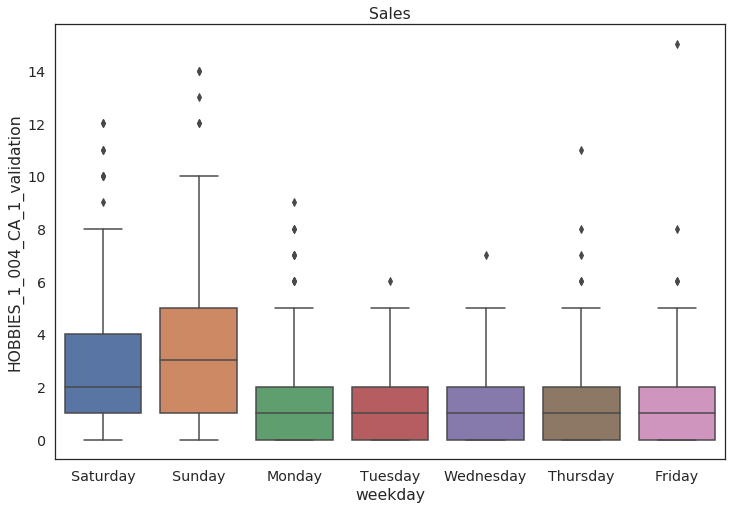

In [29]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.boxplot(x = "weekday", y = example_item, data = item_example)
ax.set(title = 'Sales')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4ff859a940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4ff85304e0>)

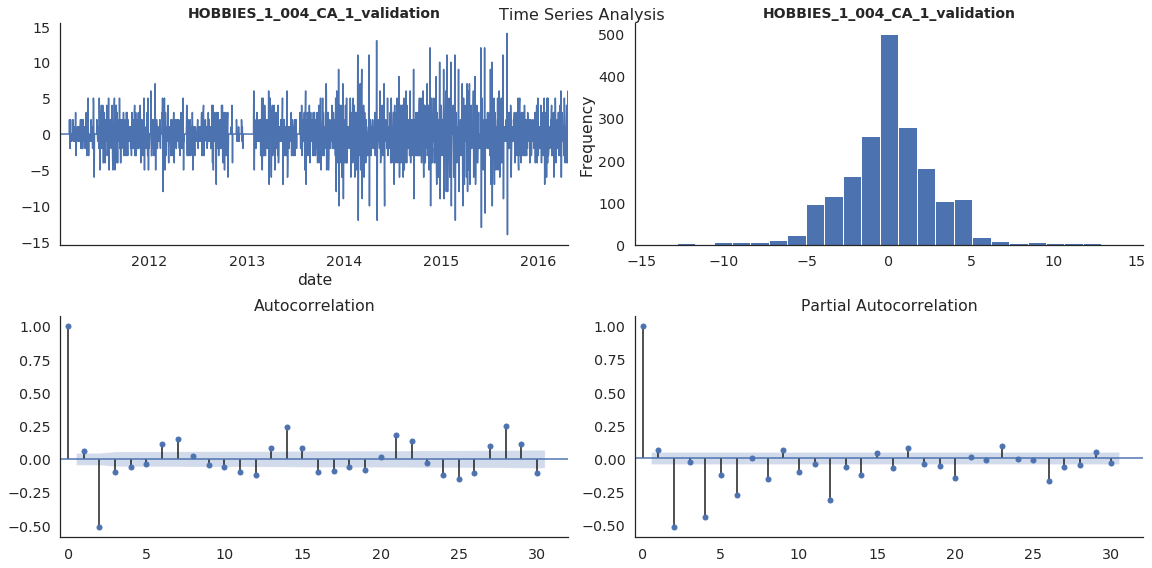

In [114]:
tsplot(y = item_example[example_item], diff = 2, title = example_item, lags = 30)